In [1]:
import pandas as pd

In [2]:
corona = pd.read_csv('../../csv/corona.csv')
corona.head(1)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN


In [4]:
# 특정 컬럼을 제거 
# drop( 조건, axis = {0(rows) | 1(columns)} , inplace = {bool} )
# drop() 함수는 데이터프레임 class 안에 있는 함수
# 데이터프레임명.drop()
# asix : 행을 지울 것인가? -> 0|"rows"  // 열을 지울것인가? -> 1|'columns'
# inplace : 참/거짓 형태 데이터를 입력값을 받는다. 
#           참 인 경우 : 기준이 되는 데이터프레임을 변경
#           거짓인 경우 : 기준이 되는 데이터프레임을 변경시키지 않는다(기본값)
corona.drop('Unnamed: 0', axis = 1, inplace=True)
# corona = corona.drop('Unnamed: 0', axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

1. 컬럼의 이름을 변경 
    - ['등록일시', '총사망자', '총확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진율']
2. 데이터프레임의 정보를 확인하고 결측치가 존재한다면 결측치의 개수를 출력

In [5]:
corona2 = corona.copy()

In [7]:
# case1 
corona.columns = ['등록일시', '총사망자', '총확진자', '게시글번호', '기준일', '기준시간',
                  '수정일시', '누적의심자', '누적확진자']
corona.head(1)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN


In [8]:
corona2.columns

Index(['createDt', 'deathCnt', 'decideCnt', 'seq', 'stateDt', 'stateTime',
       'updateDt', 'accExamCnt', 'accDefRate'],
      dtype='object')

In [11]:
# case2
corona2 = corona2.rename(columns={
    'createDt' : '등록일시', 
    'deathCnt' : '총사망자', 
    'decideCnt' : '총확진자', 
    'seq' : '게시글번호', 
    'stateDt' : '기준일', 
    'stateTime' : '기준시간', 
    'updateDt' : '수정일시', 
    'accExamCnt' : '누적의심자', 
    'accDefRate' : '누적확진자'
})

In [12]:
# 결측치가 있는지 확인 
# 데이터프레임의 정보 출력 
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일시    820 non-null    object 
 1   총사망자    820 non-null    int64  
 2   총확진자    820 non-null    int64  
 3   게시글번호   820 non-null    int64  
 4   기준일     820 non-null    int64  
 5   기준시간    820 non-null    object 
 6   수정일시    817 non-null    object 
 7   누적의심자   692 non-null    float64
 8   누적확진자   623 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 57.8+ KB


In [14]:
# 결측치의 개수 확인 
corona.isna().sum()

등록일시       0
총사망자       0
총확진자       0
게시글번호      0
기준일        0
기준시간       0
수정일시       3
누적의심자    128
누적확진자    197
dtype: int64

In [15]:
corona.head()

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [21]:
# 등록일시를 기준으로 오름차순 정렬 변경
# sort_values({기준이 되는 컬럼명}, ascending=bool, inplace=bool)
# 기준이되는 컬럼명 : 복수 선택이 가능 (튜플이나 리스트)
# asceding : 오름차순(True)(기본값) / 내림차순(False)
# inplace : 기준이 되는 데이터프레임을 변경할것인가
corona.sort_values(['등록일시'], ascending= True, inplace=True)
# corona = corona.sort_values(['등록일시'])

In [22]:
corona.head(3)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744


In [27]:
# 인덱스를 재지정(초기화)
# reset_index(drop = bool, inplace = bool)
# drop : 기존의 인덱스의 값을 제거할것인가? 기본값은 False
# corona.reset_index().drop(['index'], axis=1)
corona.reset_index(drop=True, inplace=True)

In [28]:
corona.head(3)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744


In [31]:
# 인덱스가 1이고 컬럼이 총사망자 인 데이터를 출력 
# 데이터프레임명.loc[인덱스의조건, 컬럼의조건]
corona.loc[1, '총사망자'] - corona.loc[0, '총사망자']

6

In [34]:
# 일일 사망자데이터를 리스트 생성
_list = [0]

for i in range(819):
    data = corona.loc[i+1, '총사망자'] - corona.loc[i, '총사망자']
    _list.append(data)
print(_list)

[0, 6, 6, 1, 5, 3, 0, 6, 3, 7, 3, 8, 2, 7, 9, 6, 5, 8, 5, 8, 6, 4, 3, 4, 5, 3, 6, 3, 6, 8, 4, 4, 3, 3, 3, 5, 3, 4, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 3, 5, 2, 1, 0, 2, 3, 2, 2, 1, 2, 5, 3, 2, 4, 5, 3, 5, 4, 0, 5, 5, 1, 5, 2, 3, 0, 5, 2, 4, 2, 5, 1, 6, 2, 1, 4, 1, 1, 0, 3, 2, 1, 2, 2, 1, 1, 4, 1, 2, 2, 1, 0, 3, 3, 3, 2, 2, 0, 0, 3, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1, 1, 1, 2, 5, 2, 0, 1, 4, 1, 1, 0, 2, 2, 3, 2, 2, 4, 1, 3, 2, 1, 6, 1, 3, 0, 0, 3, 7, 4, 5, 4, 3, 4, 8, 8, 6, 2, 7, 13, 12, 22, 11, 14, 15, 24, 24, 17, 17, 17, 20, 15, 11, 40, 20, 21, 17, 25, 20, 19, 26, 20, 19, 35, 19, 25, 15, 25, 20, 10, 22, 19, 13, 15, 19, 17, 16, 12, 9, 12,

In [43]:
corona['일일사망자'] = _list

In [44]:
corona.head()

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5


In [42]:
# dict 데이터
dict = {
    'name' : 'test', 
    'age' : 20
}
# dict에서 'test' 문자열만 출력하려면?
print(dict['name'])
# dict에 새로운 key:value를 추가 
dict['area']

test


KeyError: 'area'

In [ ]:
# shift(n) : n은 기본값이 1 지정, 데이터를 n만큼 인덱스 이동
corona['총사망자'].shift(1)

In [50]:
corona['일일사망자2'] = corona['총사망자'] - corona['총사망자'].shift(1)

In [ ]:
corona.tail(3)

In [54]:
# diff(n) : 인덱스가 n만큼 이동한 데이터와의 차이 값 출력
corona['일일사망자3'] = corona['총사망자'].diff(1)

In [55]:
corona.tail(10)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일사망자2,일일사망자3
810,2022-05-30 09:01:30.847,24167,18086392,895,20220530,00:00,2022-06-04 08:59:37.203,NaN,NaN,9,9.0,9.0
811,2022-05-31 08:55:39.977,24176,18103577,896,20220531,00:00,2022-06-04 08:59:23.637,NaN,NaN,9,9.0,9.0
812,2022-06-01 09:07:30.461,24197,18119345,897,20220601,00:00,2022-06-08 09:12:05.316,NaN,NaN,21,21.0,21.0
813,2022-06-02 08:58:19.746,24212,18129236,898,20220602,00:00,2022-06-08 09:11:51.985,NaN,NaN,15,15.0,15.0
814,2022-06-03 09:08:18.729,24229,18141775,899,20220603,00:00,2022-06-08 09:11:38.938,NaN,NaN,17,17.0,17.0
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,9,9.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,20,20.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,21,21.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,20,20.0,20.0
819,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,6,6.0,6.0


In [59]:
### 위와 같은 방법으로 일일확진자 컬럼을 추가

corona['일일확진자'] = (corona['총확진자'] - corona['총확진자'].shift()).fillna(0)

In [62]:
corona['일일확진자2'] = corona['총확진자'].diff().fillna(0)

In [63]:
corona.tail(10)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일사망자2,일일사망자3,일일확진자,일일확진자2
810,2022-05-30 09:01:30.847,24167,18086392,895,20220530,00:00,2022-06-04 08:59:37.203,NaN,NaN,9,9.0,9.0,6135.0,6135.0
811,2022-05-31 08:55:39.977,24176,18103577,896,20220531,00:00,2022-06-04 08:59:23.637,NaN,NaN,9,9.0,9.0,17185.0,17185.0
812,2022-06-01 09:07:30.461,24197,18119345,897,20220601,00:00,2022-06-08 09:12:05.316,NaN,NaN,21,21.0,21.0,15768.0,15768.0
813,2022-06-02 08:58:19.746,24212,18129236,898,20220602,00:00,2022-06-08 09:11:51.985,NaN,NaN,15,15.0,15.0,9891.0,9891.0
814,2022-06-03 09:08:18.729,24229,18141775,899,20220603,00:00,2022-06-08 09:11:38.938,NaN,NaN,17,17.0,17.0,12539.0,12539.0
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,9,9.0,9.0,12039.0,12039.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,20,20.0,20.0,9834.0,9834.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,21,21.0,21.0,5022.0,5022.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,20,20.0,20.0,6172.0,6172.0
819,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,6,6.0,6.0,13358.0,13358.0


In [64]:
import numpy as np

In [68]:
corona2 = corona.copy()

In [69]:
# 일일사망자2, 일일사망자3 컬럼의 결측치를 0을 대체(채워준다.)
corona[['일일사망자2', '일일사망자3']] = corona[['일일사망자2', '일일사망자3']].fillna(0)

In [70]:
corona.head(2)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일사망자2,일일사망자3,일일확진자,일일확진자2
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0,0.0,0.0,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6,6.0,6.0,242.0,242.0


In [74]:
corona2[['일일사망자2', '일일사망자3']] =\
      corona2[['일일사망자2', '일일사망자3']].replace(np.nan, 0)

In [ ]:
corona['일일사망자'] < 0

In [76]:
corona.loc[corona['일일사망자'] < 0]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일사망자2,일일사망자3,일일확진자,일일확진자2
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-2,-2.0,-2.0,-430.0,-430.0


In [77]:
corona.loc[444:448]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일사망자2,일일사망자3,일일확진자,일일확진자2
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,5,5.0,5.0,533.0,533.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,8,8.0,8.0,910.0,910.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-2,-2.0,-2.0,-430.0,-430.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,6,6.0,6.0,889.0,889.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,2,2.0,2.0,677.0,677.0


In [79]:
corona.iloc[445, 0] = '2021-05-31 00:00:00.000'

In [ ]:
corona.iloc[445]

In [81]:
# 등록일시를 기준으로 오름차순 정렬
corona.sort_values(['등록일시'], inplace=True)
# 인덱스를 재지정
corona.reset_index(drop=True, inplace=True)
# 일일사망자 컬럼의 데이터를 수정 (shift 사용)
corona['일일사망자'] = (corona['총사망자'] - corona['총사망자'].shift()).fillna(0)
# 일일확진자 컬럼의 데이터를 수정 (diff 사용)
corona['일일확진자'] = corona['총확진자'].diff().fillna(0)
# 일일사망자2, 일일사망자3, 일일확진자2 컬럼을 삭제
corona.drop(['일일사망자2', '일일사망자3', '일일확진자2'], axis=1, inplace=True)

In [82]:
# 일일사망자가 음수인 데이터가 존재하는가?
corona.loc[corona['일일사망자'] < 0]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일확진자


In [83]:
corona

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진자,일일사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,9.0,12039.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,20.0,9834.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,21.0,5022.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,20.0,6172.0


In [84]:
import matplotlib.pyplot as plt 

In [88]:
import platform

In [89]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

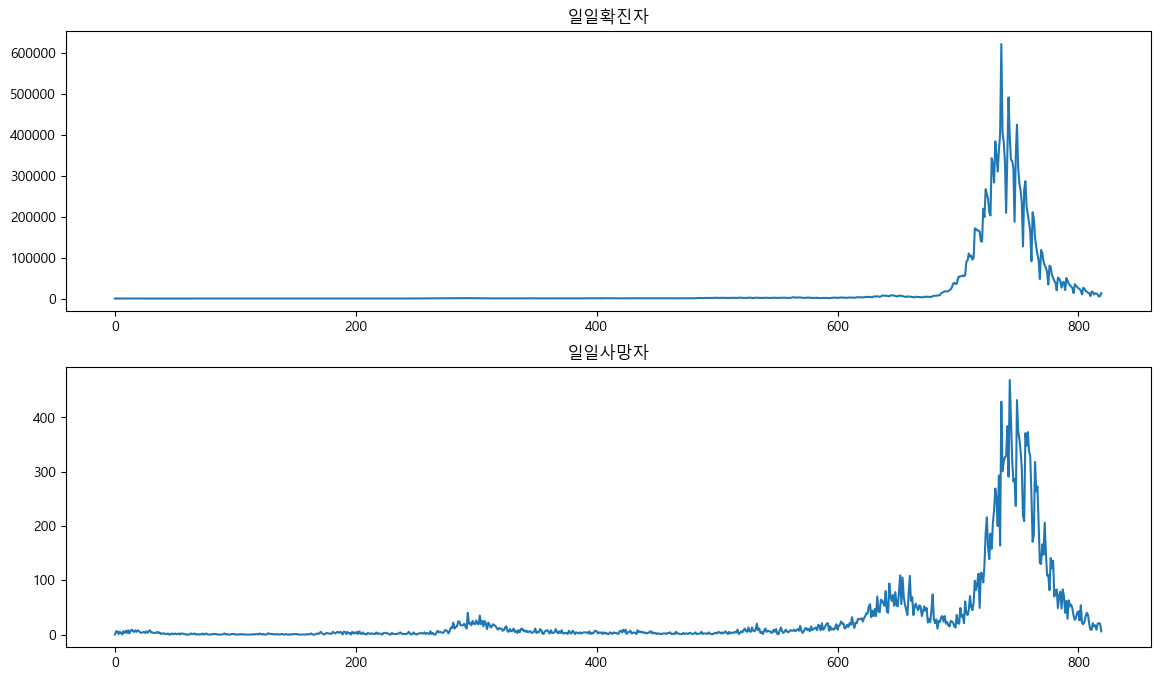

In [91]:
# 일일확진자, 일일사망자 수치를 라인 그래프 표시 
x = corona.index
y1 = corona['일일확진자']
y2 = corona['일일사망자']

plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title('일일확진자')
plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.title('일일사망자')
plt.show()